#### Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import tensorflow as tf
from tensorflow.keras.models import load_model, save_model

import pickle


/var/folders/bv/lfhs9spj5ldb88y3g1cy9z_w0000gn/T/ipykernel_78098/952093508.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Loading the dataset

In [2]:
dataset = pd.read_csv('NFLX.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-19,355.799988,365.000000,355.320007,361.920013,361.920013,7396600
1,2019-02-20,364.850006,366.709991,356.700012,359.910004,359.910004,8110700
2,2019-02-21,360.029999,362.850006,353.880005,356.970001,356.970001,6227900
3,2019-02-22,360.339996,366.130005,360.049988,363.019989,363.019989,7088200
4,2019-02-25,367.010010,371.489990,363.790009,363.910004,363.910004,7569300


In [3]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2024-02-09,565.000000,566.000000,558.099976,561.320007,561.320007,3055700
1254,2024-02-12,560.359985,568.440002,557.000000,557.849976,557.849976,3608500
1255,2024-02-13,550.799988,559.200012,549.000000,554.520020,554.520020,3511500
1256,2024-02-14,567.260010,581.250000,564.340027,579.330017,579.330017,5634200
1257,2024-02-15,581.909973,593.770020,580.320007,593.460022,593.460022,5214100


#### Dataset Meta Data Information

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None


#### Check for any nulls in the dataset

In [5]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no nulls in the dataset

#### Statisctical information 

In [6]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,406.696391,412.843346,400.479452,406.767035,406.767035,7.025740e+06
std,116.568514,117.313899,115.505357,116.323932,116.323932,6.365560e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,323.452492,328.910004,317.985008,322.999992,322.999992,3.965550e+06
50%,388.524994,395.959992,380.569993,388.904999,388.904999,5.569450e+06
75%,499.997498,505.324997,492.054993,499.095001,499.095001,7.862600e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


#### EDA

In [7]:
cor = dataset.iloc[:,1:].corr()
cor

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998846,0.998934,0.997570,0.997570,-0.341733
High,0.998846,1.000000,0.998671,0.998925,0.998925,-0.330327
Low,0.998934,0.998671,1.000000,0.998868,0.998868,-0.353510
Close,0.997570,0.998925,0.998868,1.000000,1.000000,-0.339938
Adj Close,0.997570,0.998925,0.998868,1.000000,1.000000,-0.339938
Volume,-0.341733,-0.330327,-0.353510,-0.339938,-0.339938,1.000000


<Axes: >

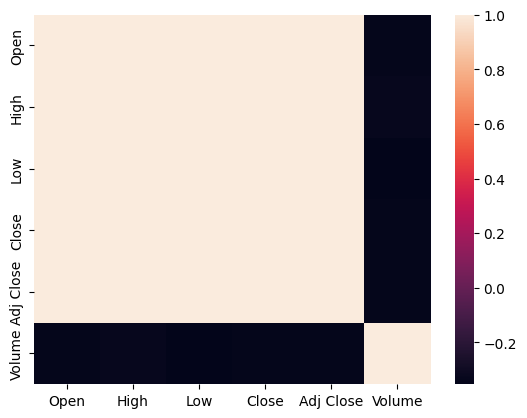

In [8]:
sns.heatmap(cor)

##### Relation b/w Open and Close variables

<Axes: xlabel='Open', ylabel='Close'>

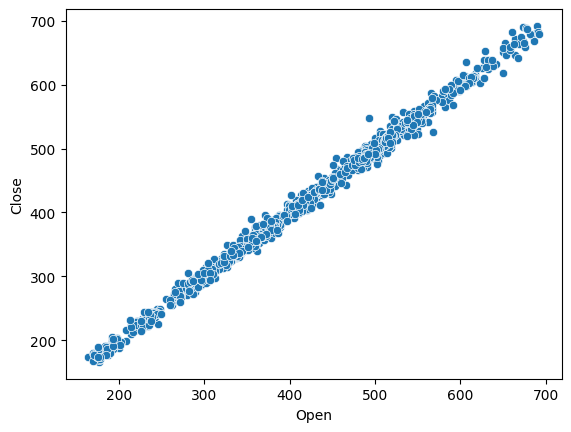

In [9]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'Close',
               )

We see that as value of Open increases, the close value also increases, showing positive correlation.

##### Relation b/w High and Close Variables

<Axes: xlabel='High', ylabel='Close'>

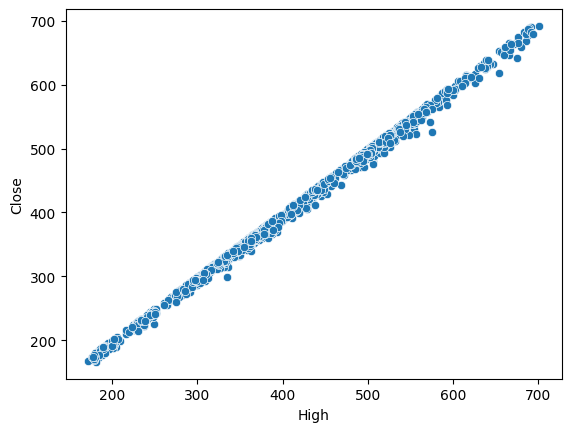

In [10]:
sns.scatterplot(data = dataset, 
                x= 'High', 
                y = 'Close',
               )

We see that as value of High increases, the close value also increases, showing positive correlation.

##### Relation b/w Low and Close Variables

<Axes: xlabel='Low', ylabel='Close'>

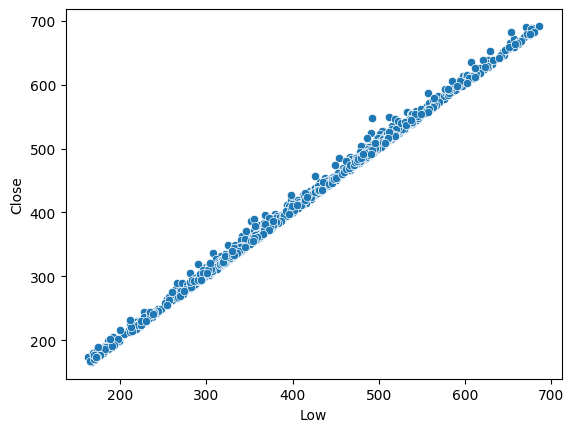

In [11]:
sns.scatterplot(data = dataset, 
                x= 'Low', 
                y = 'Close',
               )

We see that as value of Low increases, the close value also increases, showing positive correlation.

##### Relation b/w Volume and Close Variables

<Axes: xlabel='Volume', ylabel='Close'>

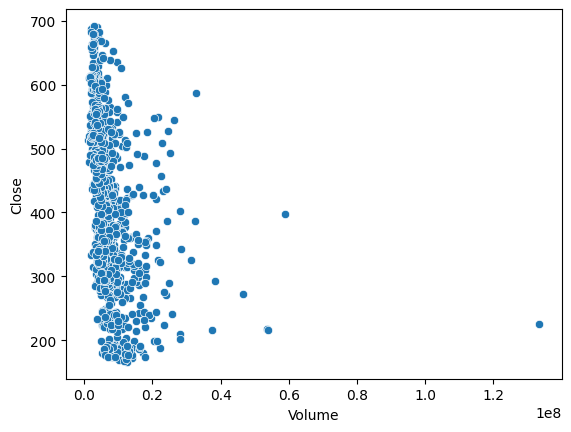

In [12]:
sns.scatterplot(data = dataset, 
                x= 'Volume', 
                y = 'Close',
               )

As we see, most of the observations have value of close to be high at lower values of Volume, and there are only few observations at high volume region, that have low close values. This kind of behavior implies slightly negative correlation

##### Boxplot

<Axes: >

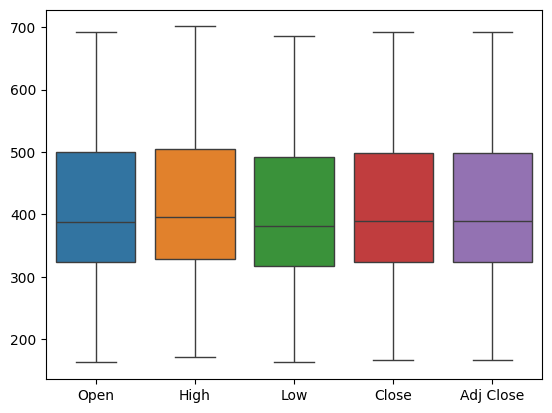

In [13]:
sns.boxplot(data = dataset.iloc[:,:-1])

And from above we see that all the variables are equally distributed, their means are close to each other.

##### Relation b/w Open and High Variables

<Axes: xlabel='Open', ylabel='High'>

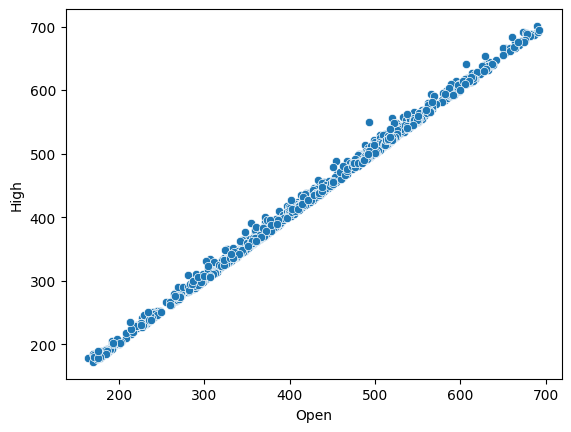

In [14]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'High',
               )

##### Relation b/w Open and Low Variables

<Axes: xlabel='Open', ylabel='Low'>

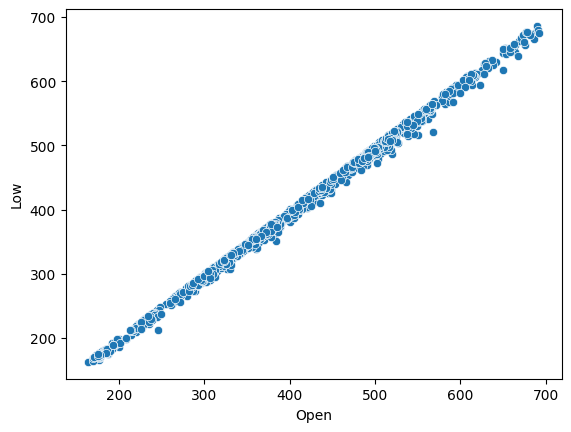

In [15]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'Low',
               )

##### Relation b/w High and Low Variables

<Axes: xlabel='High', ylabel='Low'>

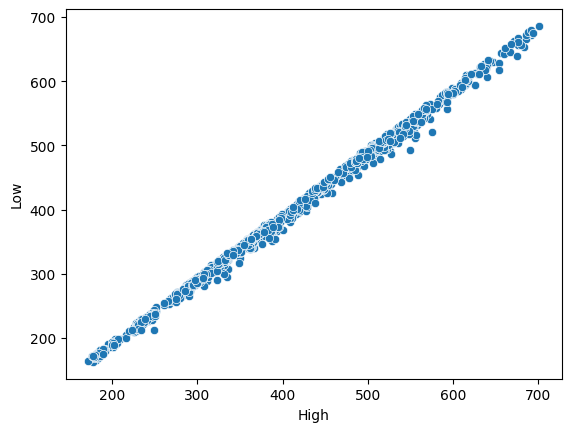

In [16]:
sns.scatterplot(data = dataset, 
                x= 'High', 
                y = 'Low',
               )

As we see, most of the relationships are linear.

#### Train Test Split

In [17]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [18]:
X.head()

,Open,High,Low,Volume
0,355.799988,365.000000,355.320007,7396600
1,364.850006,366.709991,356.700012,8110700
2,360.029999,362.850006,353.880005,6227900
3,360.339996,366.130005,360.049988,7088200
4,367.010010,371.489990,363.790009,7569300


In [19]:
y[:5]

0    361.920013
1    359.910004
2    356.970001
3    363.019989
4    363.910004
Name: Close, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((943, 4), (315, 4), (943,), (315,))

#### Feature Scaling

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.18859014, -0.22571581, -0.30905939, -0.17880959],
       [ 0.7063158 ,  0.7168404 ,  0.72844121, -0.48342275],
       [ 0.93565483,  0.92465768,  0.98606422, -0.71441131],
       ...,
       [ 0.52077728,  0.53026822,  0.56125132, -0.16836468],
       [-0.39835868, -0.34273444, -0.35504521, -0.12619487],
       [ 0.94378822,  0.94885384,  0.92563305, -0.62705526]])

In [22]:
X_train[1,:]

array([ 0.7063158 ,  0.7168404 ,  0.72844121, -0.48342275])

We save the scaler information in a pickle file

In [23]:
pickle.dump(sc,open('scaler.pkl','wb'))

#### We try building various models to predict the stock price, and then select the model with better performance

#### 1. Simple Linear Regression

As we see, most of the features have linear relationship with each other, we start using a single column to predict the stock price.

In [24]:
colList = X.columns
colList

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [25]:
train_r2score = []
test_r2score = []
train_error = []
test_error = []
abs_train = []
abs_test = []
for i,col in enumerate(colList):
#     print(i,col)
    train_x = X_train[:,i].reshape(-1,1)
    test_x = X_test[:,i].reshape(-1,1)
    
    LinearRegressor = LinearRegression()
    LinearRegressor.fit(train_x,y_train)
    
    train_err = mean_squared_error(y_train, LinearRegressor.predict(train_x))
    test_err = mean_squared_error(y_test, LinearRegressor.predict(test_x))
    
    train_r2 = r2_score(y_train, LinearRegressor.predict(train_x))
    test_r2 = r2_score(y_test, LinearRegressor.predict(test_x))
    
    abs_train.append(mean_absolute_error(y_train, LinearRegressor.predict(train_x)))
    abs_test.append(mean_absolute_error(y_test, LinearRegressor.predict(test_x)))
    train_error.append(train_err)
    test_error.append(test_err)
    train_r2score.append(train_r2)
    test_r2score.append(test_r2)
    

In [26]:
error_df = pd.DataFrame(zip(colList,train_error, test_error), columns = ["Features","train_error","test_error"])
error_df

,Features,train_error,test_error
0,Open,63.660348,71.507764
1,High,26.918608,35.506271
2,Low,31.825443,26.885360
3,Volume,12222.580851,11177.103115


<Axes: xlabel='None'>

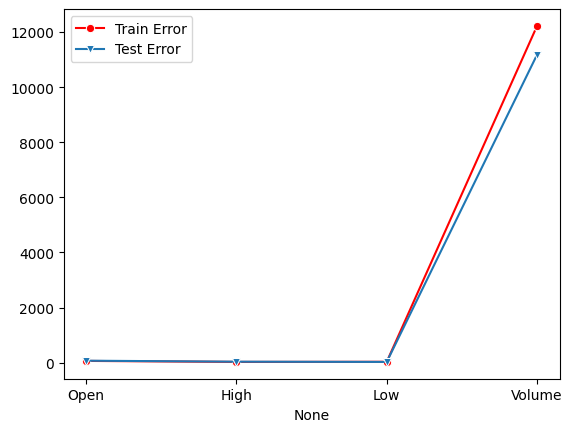

In [27]:
sns.lineplot(x=colList, y = train_error, marker='o', color='r', label='Train Error')
sns.lineplot(x=colList, y = test_error, marker='v', label='Test Error')


In [28]:
r2_df = pd.DataFrame(zip(colList,train_r2score, test_r2score), columns = ["Features","train_r2","test_r2"])
r2_df

,Features,train_r2,test_r2
0,Open,0.995408,0.994263
1,High,0.998058,0.997151
2,Low,0.997704,0.997843
3,Volume,0.118280,0.103265


<Axes: xlabel='None'>

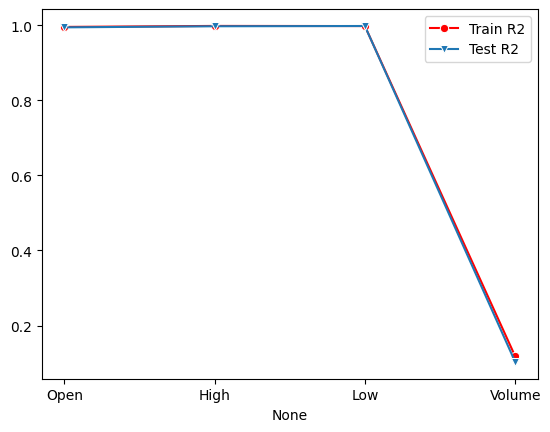

In [29]:
sns.lineplot(x=colList, y = train_r2score, marker='o', color='r', label='Train R2')
sns.lineplot(x=colList, y = test_r2score, marker='v', label='Test R2')


In [30]:
mae_df = pd.DataFrame(zip(colList,abs_train, abs_test), columns = ["Features","train_mae","test_mae"])
mae_df

,Features,train_mae,test_mae
0,Open,5.915487,6.308519
1,High,3.908190,4.225259
2,Low,3.968445,3.837656
3,Volume,91.942016,88.093729


<Axes: xlabel='None'>

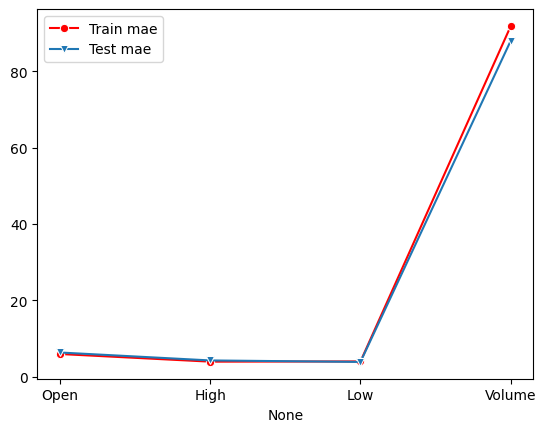

In [31]:
sns.lineplot(x=colList, y = abs_train, marker='o', color='r', label='Train mae')
sns.lineplot(x=colList, y = abs_test, marker='v', label='Test mae')


#### Fitting a model with only one column i.e., using feature High

In [32]:
LinearRegressor = LinearRegression()
train_x = X_train[:,1].reshape(-1,1)
test_x = X_test[:,1].reshape(-1,1)
LinearRegressor.fit(train_x, y_train)

LinearRegression()

In [33]:
y_pred = LinearRegressor.predict(X_test[:,1].reshape(-1,1))
y_pred[0:5]

array([519.53130319, 478.23887852, 461.1626216 , 188.01194549,
       501.57246068])

#### Vizualize train set results

<Axes: ylabel='Close'>

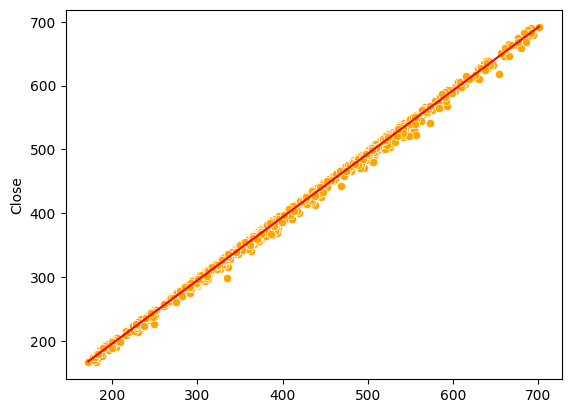

In [34]:
sns.scatterplot(
    x = sc.inverse_transform(
        X_train)[:,1],
        y = y_train,
    color = 'orange'
)
sns.lineplot(
    x = sc.inverse_transform(
        X_train)[:,1],
    y = LinearRegressor.predict(train_x),
    color = 'red'
)

#### Vizualize test set results

<Axes: ylabel='Close'>

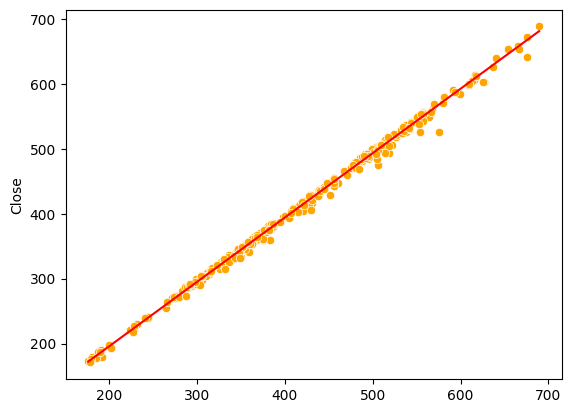

In [35]:
sns.scatterplot(
    x = sc.inverse_transform(
        X_test)[:,1],
        y = y_test,
    color = 'orange'
)
sns.lineplot(
    x = sc.inverse_transform(
        X_test)[:,1],
    y = LinearRegressor.predict(test_x),
    color = 'red'
)

#### 2. Multiple Linear Regression

Now we use all the existing features to build the model and check the train and test loss and r_squared value

In [36]:
MultipleRegressor = LinearRegression()
MultipleRegressor.fit(X_train,y_train)

LinearRegression()

In [37]:
MultipleRegressor.coef_

array([-61.24302115,  92.38827695,  86.60792079,   0.26869675])

In [38]:
MultipleRegressor.intercept_

405.09753956097563

In [39]:
y_pred = MultipleRegressor.predict(X_test)

In [40]:
mean_squared_error(y_train, MultipleRegressor.predict(X_train))

14.78180781602594

In [41]:
mean_squared_error(y_test, y_pred)

12.263927007335747

In [42]:
mean_absolute_error(y_test, y_pred)

2.7722164004229253

In [43]:
r2_score(y_train, MultipleRegressor.predict(X_train))

0.9989336613925041

In [44]:
r2_score(y_test, y_pred)

0.9990160699386574

#### 3. Artificial Neural Networks

In [100]:
# Initialize an ANN
# Sequential() allows to build sequential layers
ann = tf.keras.models.Sequential()
ann

In [101]:
# Adding input layer and first input layer
# dense class is used to create a fully connnected layer as a dense class object at any phase in an ann.
# add method is used to add any layer( hidden/ dropout/ conv2D) created using dense class
# When you create a first hidden layer, it automatically creates an input layer by assining
# # of neurons == # of input features. So in below, we mention # of neurons req for the first hidden layer
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

In [102]:
# Add second sequnetial layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))

In [103]:
# Add output layer
# When doing multiclass classification, use softmax instead of sigmoid
ann.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [104]:
# Compiling an ANN
# in this step, we mention the optimizer, loss function and metrics required to evaluate our model

ann.compile(optimizer = 'adam', 
            loss = tf.keras.losses.MeanSquaredError(), 
            metrics = tf.keras.metrics.R2Score())

In [105]:
# Training an ANN
ann.fit(X_train, y_train, batch_size = 16, epochs = 300)

Epoch 1/300
59/59 [==============================] - 0s 424us/step - loss: 177574.6406 - r2_score: -11.8099
Epoch 2/300
59/59 [==============================] - 0s 346us/step - loss: 176837.5312 - r2_score: -11.7568
Epoch 3/300
59/59 [==============================] - 0s 332us/step - loss: 175048.1875 - r2_score: -11.6278
Epoch 4/300
59/59 [==============================] - 0s 328us/step - loss: 170705.3125 - r2_score: -11.3144
Epoch 5/300
59/59 [==============================] - 0s 314us/step - loss: 161590.5625 - r2_score: -10.6569
Epoch 6/300
59/59 [==============================] - 0s 326us/step - loss: 145793.6250 - r2_score: -9.5173
Epoch 7/300
59/59 [==============================] - 0s 333us/step - loss: 123261.3750 - r2_score: -7.8919
Epoch 8/300
59/59 [==============================] - 0s 326us/step - loss: 96530.0625 - r2_score: -5.9636
Epoch 9/300
59/59 [==============================] - 0s 321us/step - loss: 70233.8984 - r2_score: -4.0666
Epoch 10/300
59/59 [==============

In [106]:
input_obs = [401.970001, 427.700012, 398.200012, 427.140015]
ann.predict(sc.transform(np.array(list(input_obs)).reshape(1,-1)))

1/1 [==============================] - 0s 50ms/step


/Users/nithinkore/Documents/GitHub/NetflixSPPredE2E/NetflixStockPricePrediction/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[417.5234]], dtype=float32)

In [107]:
y_pred = ann.predict(X_test)
y_pred[:5]

10/10 [==============================] - 0s 448us/step


array([[518.33136],
       [477.37094],
       [464.16092],
       [184.80118],
       [505.72156]], dtype=float32)

In [108]:
mean_squared_error(y_test, y_pred)

14.251648810600633

In [109]:
mean_squared_error(y_train, ann.predict(X_train))

 1/30 [>.............................] - ETA: 0s

30/30 [==============================] - 0s 377us/step


15.306355517953232

In [110]:
r2_score(y_test, y_pred)

0.9988565957967575

In [111]:
r2_score(y_train, ann.predict(X_train))

 1/30 [>.............................] - ETA: 0s

30/30 [==============================] - 0s 373us/step


0.9988958212667901

In [112]:
mean_absolute_error(y_test, y_pred)

2.9569763922619057

##### Plotting a scatter for the predictions

<Axes: xlabel='Close'>

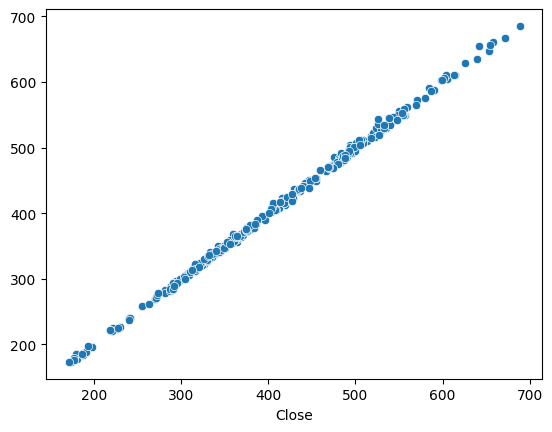

In [113]:
sns.scatterplot(x = y_test, y = y_pred.flatten())

This in a kind of evidence showing that the model is performing well for the given task. 

##### Plotting residuals

In [114]:
residuals = y_test - y_pred.flatten() 
residuals

520    -0.311340
405     5.509064
1197    1.749085
846    -5.201172
552     0.798431
          ...   
343     9.103515
122    -0.859772
1080   -0.195801
899    -3.353836
490    -6.064392
Name: Close, Length: 315, dtype: float64

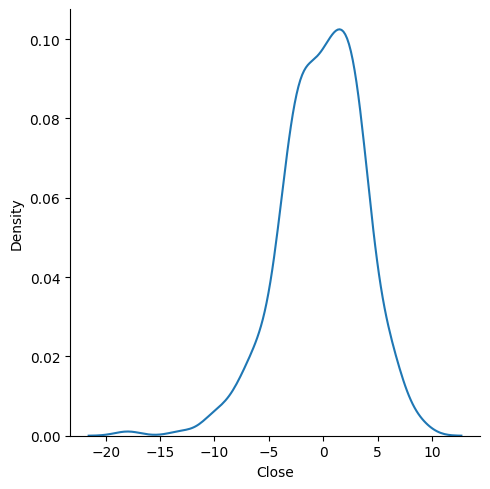

In [115]:
sns.displot(residuals, kind = 'kde')

#### pickle the model file for deployment

In [116]:
# pickle.dump(ann, open("ann_model.pkl", "wb"))

ann.save("ann_model.h5")

/Users/nithinkore/Documents/GitHub/NetflixSPPredE2E/NetflixStockPricePrediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
loaded_model = load_model('ann_model.h5')

In [118]:
loaded_model.predict(X_test)

10/10 [==============================] - 0s 364us/step


array([[518.33136],
       [477.37094],
       [464.16092],
       [184.80118],
       [505.72156],
       [290.77933],
       [498.87015],
       [477.5847 ],
       [300.18427],
       [483.79395],
       [331.17184],
       [472.92496],
       [339.7089 ],
       [340.1559 ],
       [365.13455],
       [418.619  ],
       [321.77963],
       [223.76959],
       [320.41165],
       [362.1482 ],
       [338.1924 ],
       [356.50604],
       [529.66833],
       [431.77097],
       [360.33072],
       [272.94092],
       [391.1018 ],
       [646.59937],
       [433.99817],
       [332.45053],
       [450.70462],
       [529.0236 ],
       [363.08002],
       [333.03748],
       [437.03275],
       [187.74896],
       [485.7888 ],
       [446.72046],
       [353.06998],
       [488.5682 ],
       [177.29561],
       [340.28677],
       [355.2733 ],
       [510.38898],
       [511.90005],
       [492.22385],
       [550.8451 ],
       [413.86844],
       [488.31796],
       [525.6475 ],
